<a href="https://colab.research.google.com/github/jcquimpo/GoogleColab_NBs/blob/main/Lab_1_Beautiful_Soup_%26_Selenium_IMDb_Review_Crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this lab, you will learn how to extract data with HTML tags.
<b>Beautiful Soup</b> is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.<br>
Every page on the web is composed of HTML tags. If you go to any web page and right click and select inspect source you would be able to see the structure of a web page.
- Documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

The <b> urllib.request </b> module defines functions and classes which help in opening URLs. From there, we assign the opening of the url to a beautiful soup, where we can finally use html code to acquire the data.

The HTML result seems a massive mess, but we did indeed read the source code and able to collect the data with some tricks.

### How to find HTML in your web page?
Open up your web browser and right click to see the menu.
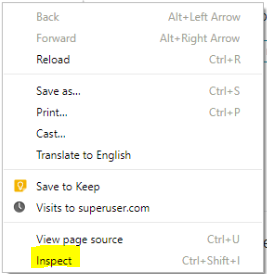

HTML looks like this!
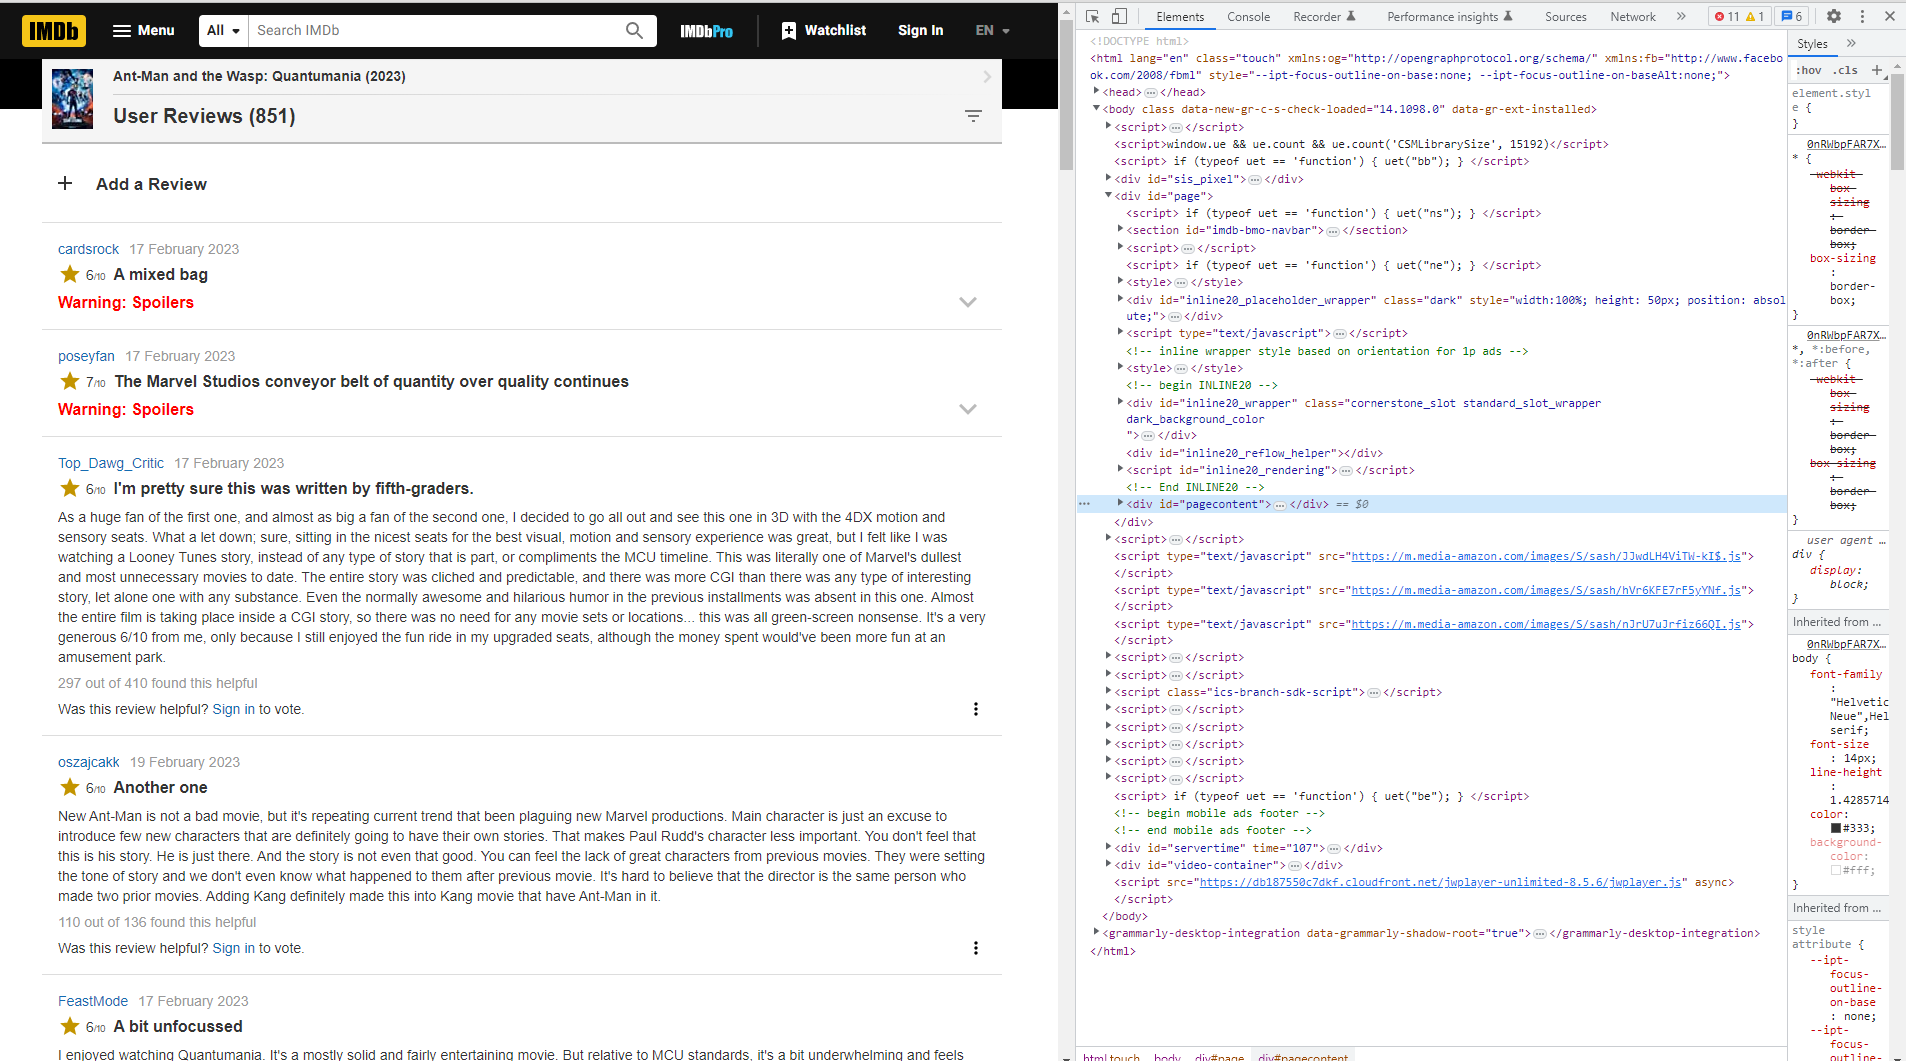

## Steps to get started

**Step 1: Install Beautifulsoup Package
Run the following command to install BeautifulSoup package.**

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install urllib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [ ]:
# Import packages
from bs4 import BeautifulSoup
import urllib.request


<b>Step 2: Run the following code to crawl the reviews</b>
<br>
In this example, we will collect reviews from Yelp.

The link to the webpage is here:
https://m.imdb.com/title/tt10954600/reviews?ref_=tt_urv


In [ ]:
url = 'https://m.imdb.com/title/tt10954600/reviews?ref_=tt_urv'

# Use urllib2 module to open the url
ourUrl = urllib.request.urlopen(url)

In [ ]:
# create a BeautifulSoup object which represents the document as a nested data structure
soup = BeautifulSoup(ourUrl,'html.parser')

In [ ]:
type(soup)

bs4.BeautifulSoup

In [ ]:
# Print out the HTML content
print(soup.prettify())

<!DOCTYPE html>
<html class="touch" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="tt10954600" property="pageId">
   <meta content="title" property="pageType">
    <meta content="reviews" property="subpageType"/>
    <link href="https://m.media-amazon.com/images/M/MV5BODZhNzlmOGItMWUyYS00Y2Q5LWFlNzMtM2I2NDFkM2ZkYmE1XkEyXkFqcGdeQXVyMTU5OTA4NTIz._V1_UY1200_CR90,0,630,1200_AL_.jpg" rel="image_src"/>
    <meta content="https://m.media-amazon.com/images/M/MV5BODZhNzlmOGItMWUyYS00Y2Q5LWFlNzMtM2I2NDFkM2ZkYmE1XkEyXkFqcGdeQXVyMTU5OTA4NTIz._V1_UY1200_CR90,0,630,1200_AL_.jpg" property="og:image"/>
    <meta content="video.movie" property="og:type"/>
    <meta content="115109575169727" property="fb:app_id"/>
    <meta content="Reviews: 蟻人與黃蜂女：量子狂熱 - IMDb" property

In [ ]:
# find all the p tags that contains review
p_tags = soup.find_all('li', attrs={'class':'ipl-content-list__item'})
print(p_tags)

[<li class="ipl-content-list__item">
<div class="imdb-user-review with-spoiler" data-review-id="rw8875577" data-title-id="tt10954600">
<div class="review-container">
<div class="review-header">
<div class="display-name-date">
<a class="display-name-link" href="/user/ur24373984/">cardsrock</a><span class="review-date">17 February 2023</span>
</div>
<div>
<div class="inline-rating"> <div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>6</span><span class="point-scale">/10</span>
</span>
</div>
</div>
<a class="title" href="/review/rw8875577/"> A mixed bag
</a> </div>
</div>
<div class="ipl-expander spoiler-warning">
<div class="ipl-expand

In [ ]:
# extract review for each p tag
review_tag = p_tags[0].find('div', attrs={'class':'text'})
review_tag.text.strip()

'After most entries in Phase 4 passed by without doing much to set up the next big bad in the MCU, I was eagerly anticipating this film given it would be the big screen introduction of Kang. While Majors shines as Kang, the rest of the film and even some of the narrative choices with Kang leave a bit of a "meh" feeling.As far as positives, Paul Rudd remains as endearing as ever. MODOK is a tad jarring, but I liked the tie-in to Yellowjacket. The visuals are solid and it\'s a very colorful movie. Majors truly has a magnetic presence on screen and I found his dialogues and conversations to be very compelling.For negatives, there aren\'t really any arcs for the characters and Ant-Man himself ends up in literally the same place (on the sidewalk thinking about how good his life is) as the beginning of the film. Scott\'s cohorts aren\'t given much to do either. The MCU hallmark of jokes undercutting serious moments unfortunately continues and honestly the comedy really didn\'t land as well a

In [ ]:
# extract rating for each p tag
rating_tag = p_tags[0].find('div', attrs={'class':'inline-rating'})
rating_tag.text.strip()

'6/10'

In [ ]:
# Create an empty list to store reviews
reviews = []
ratings = []

for p_tag in p_tags:

    # extract review
    review = p_tag.find('div', attrs={'class':'text'})
    # extract raings
    rating = p_tag.find('div', attrs={'class':'inline-rating'})
    if (review is None) or (rating is None):
      continue

     # append review
    reviews.append(review.text.strip())
     # append ratings
    ratings.append(rating.text.strip())

In [ ]:
# how many reviews we collect
len(reviews)

24

In [ ]:
# how many ratings we collect
len(ratings)

24

In [ ]:
print(reviews)
print(ratings)

['After most entries in Phase 4 passed by without doing much to set up the next big bad in the MCU, I was eagerly anticipating this film given it would be the big screen introduction of Kang. While Majors shines as Kang, the rest of the film and even some of the narrative choices with Kang leave a bit of a "meh" feeling.As far as positives, Paul Rudd remains as endearing as ever. MODOK is a tad jarring, but I liked the tie-in to Yellowjacket. The visuals are solid and it\'s a very colorful movie. Majors truly has a magnetic presence on screen and I found his dialogues and conversations to be very compelling.For negatives, there aren\'t really any arcs for the characters and Ant-Man himself ends up in literally the same place (on the sidewalk thinking about how good his life is) as the beginning of the film. Scott\'s cohorts aren\'t given much to do either. The MCU hallmark of jokes undercutting serious moments unfortunately continues and honestly the comedy really didn\'t land as well 

Well done! You have collect one page of reviews without any noise.

## Question: How to flip pages?

We learnt beautiful soup in our previous lab. However, you may find certain web pages that is hard to navigate without real mouse and keyboard interaction, such as entering password, clicking a button, and sometimes scrolling down to load more items.

Selenium driver allows us to handle more complicated web crawling situations. An important feature of WebDriver is that it can mimic a real user scenario by handling mouse and keyboard events. WebDriver also makes it possible for you to simulate advanced interactions like clicking the browser back and front buttons.

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

Executing: /tmp/apt-key-gpghome.q9G5kz50tx/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.AWXUx8sxnL/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.KkBCtrwewO/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [ ]:
!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:3 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:11 http://archive.ubuntu.com/ubuntu focal InRelease
Get:12 http://deb.debian.org/debian buster-updates/main amd64 Packages [9,745 B]
Get:13 http://deb.debian.org/debian-se

In [ ]:
url = "https://m.imdb.com/title/tt10954600/reviews?ref_=tt_urv"
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome("chromedriver", options=options)
driver.get(url)

In [ ]:
# print out the title of the website
print(driver.title)

Reviews: Ant-Man and the Wasp: Quantumania - IMDb


Locate on the element you would like the crawler to click on and copy the Xpath for your Chromedriver

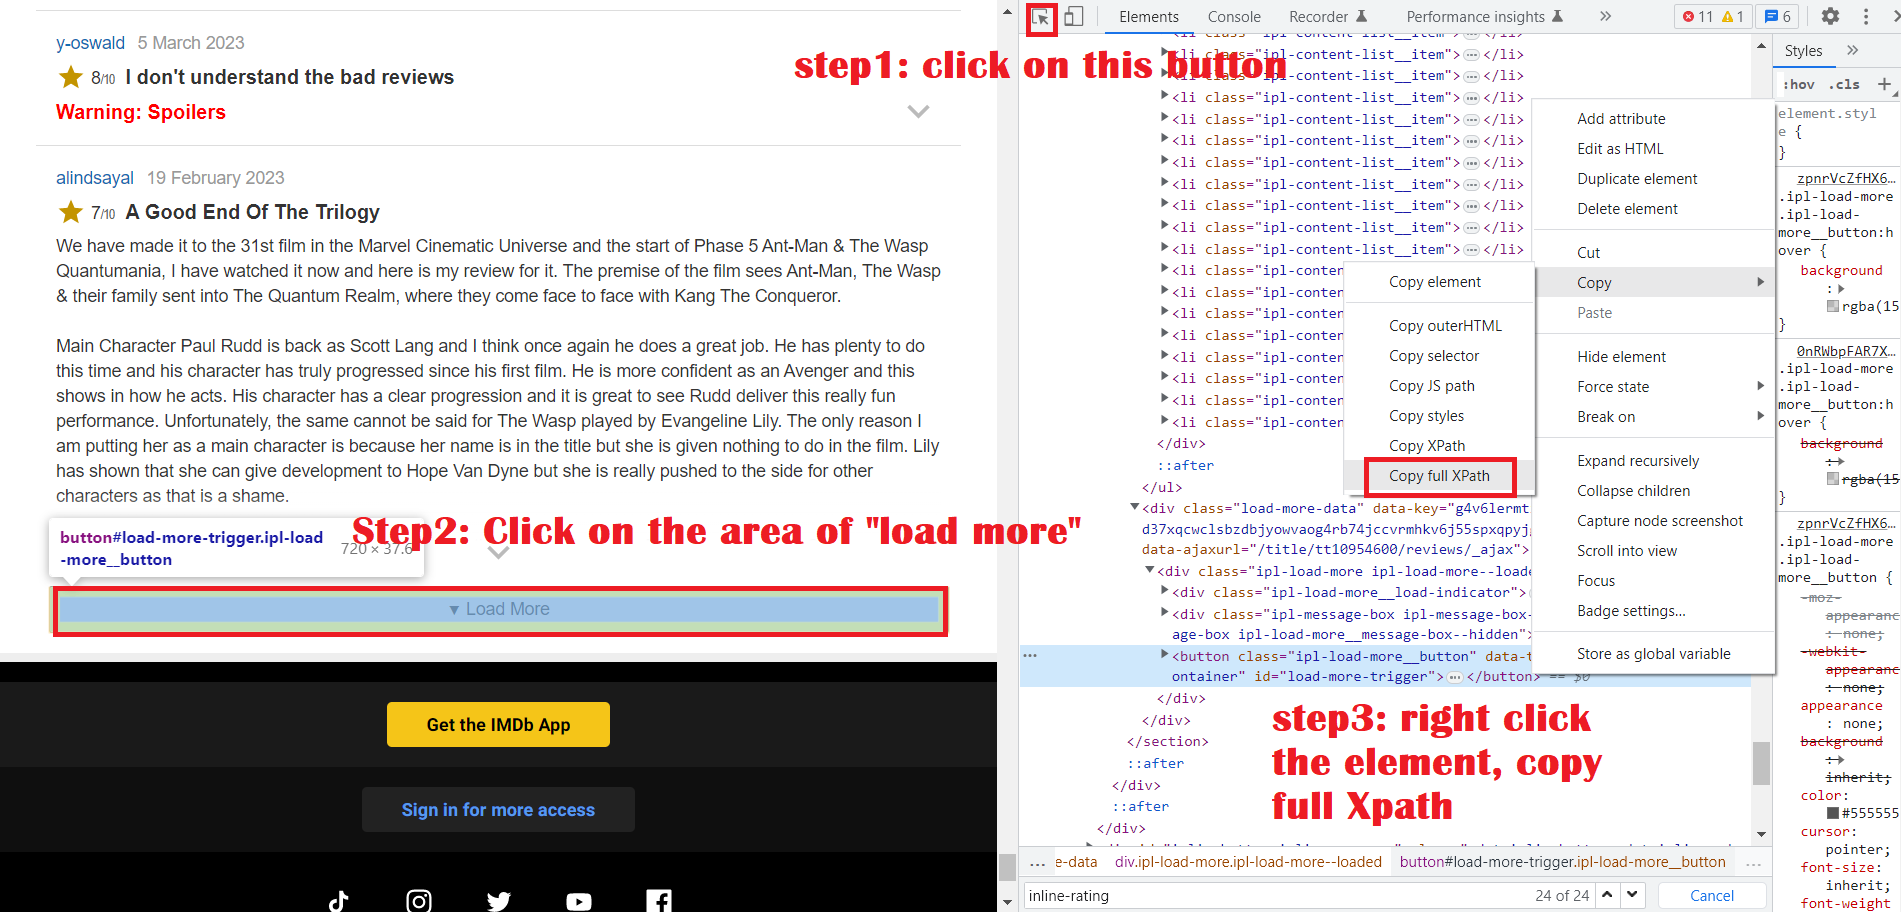

The copyed full Xpath is `/html/body/div[2]/div[4]/div[1]/div/section[2]/div/div/button`

In [ ]:
from selenium.webdriver.common.by import By
nextpage_path = '/html/body/div[2]/div[4]/div[1]/div/section[2]/div/div/button'
driver.find_element(By.XPATH,nextpage_path).click()

In [ ]:
soup = BeautifulSoup(driver.page_source,'html.parser')
# find all the p tags that contains review
p_tags = soup.find_all('li', attrs={'class':'ipl-content-list__item'})
print(p_tags)

[<li class="ipl-content-list__item">
<div class="imdb-user-review with-spoiler" data-initialized="true" data-review-id="rw8875577" data-title-id="tt10954600">
<div class="review-container">
<div class="review-header">
<div class="display-name-date">
<a class="display-name-link" href="/user/ur24373984/?ref_=m_tt_urv">cardsrock</a><span class="review-date">17 February 2023</span>
</div>
<div>
<div class="inline-rating"> <div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>6</span><span class="point-scale">/10</span>
</span>
</div>
</div>
<a class="title" href="/review/rw8875577/?ref_=tt_urv"> A mixed bag
</a> </div>
</div>
<div class="ipl

In [ ]:
# Create an empty list to store reviews
reviews = []
ratings = []

for p_tag in p_tags:

    # extract review
    review = p_tag.find('div', attrs={'class':'text'})
    # extract raings
    rating = p_tag.find('div', attrs={'class':'inline-rating'})
    if (review is None) or (rating is None):
      continue

     # append review
    reviews.append(review.text.strip())
     # append ratings
    ratings.append(rating.text.strip())

In [ ]:
# how many reviews we collect
len(reviews)

48

In [ ]:
# how many ratings we collect
len(ratings)

48

Now you have more review and ratings!

In [ ]:
import pandas as pd

df = pd.DataFrame(list(zip(reviews, ratings)), columns = ['Review', 'Rating'])

# Store review into a txt file
df.to_csv("imdb_review.csv", index=False)

Check out the 'imdb_review.csv' file, you should have collected 48 yelp reviews. Isn't that cool?!